In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
concrete_data = pd.read_csv('dataset/Concrete_Data.csv')

concrete_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
concrete_data.shape

(1030, 9)

In [5]:
concrete_data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Text(0, 0.5, 'csMPa')

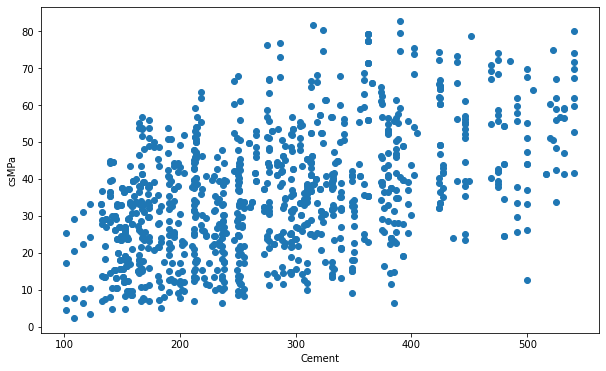

In [6]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.scatter(concrete_data['cement'], concrete_data['csMPa'])

plt.xlabel('Cement')
plt.ylabel('csMPa')

Text(0, 0.5, 'csMPa')

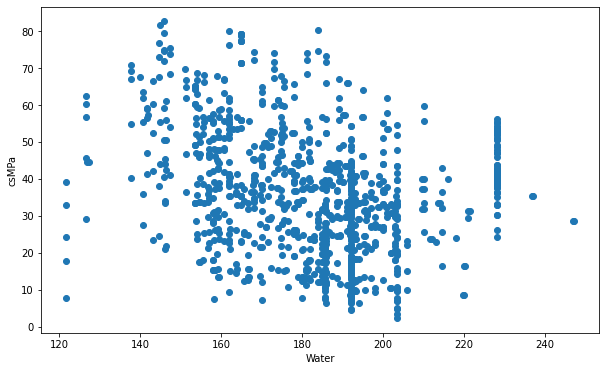

In [7]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.scatter(concrete_data['water'], concrete_data['csMPa'])

plt.xlabel('Water')
plt.ylabel('csMPa')

Text(0, 0.5, 'csMPa')

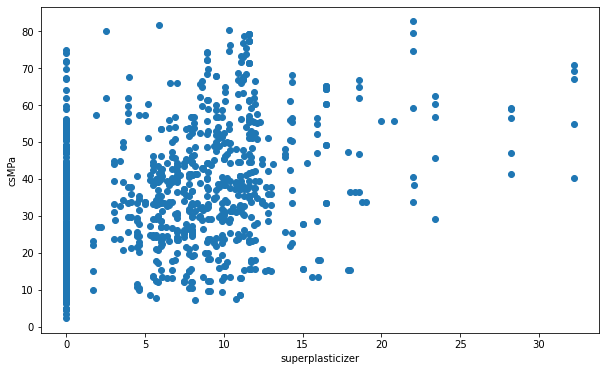

In [8]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.scatter(concrete_data['superplasticizer'], concrete_data['csMPa'])

plt.xlabel('superplasticizer')
plt.ylabel('csMPa')

<AxesSubplot:xlabel='age', ylabel='csMPa'>

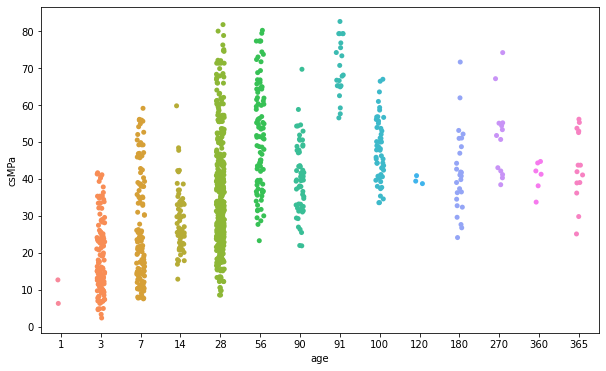

In [9]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.stripplot(concrete_data['age'], concrete_data['csMPa'])


In [10]:
concrete_data_corr = concrete_data.corr()

concrete_data_corr

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

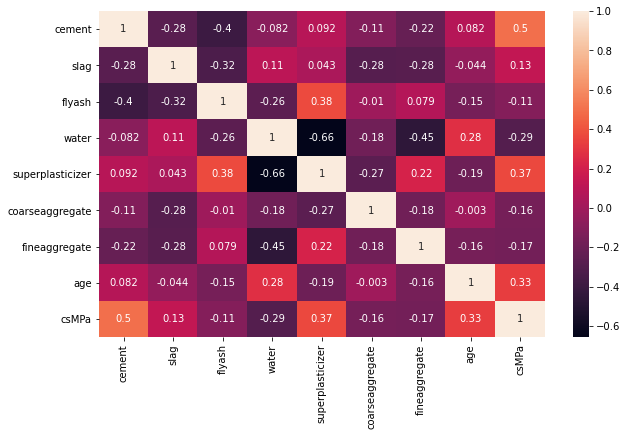

In [11]:
plt.figure(figsize = (10, 6))
sns.heatmap(concrete_data_corr, annot = True)

In [12]:
x = concrete_data.drop('csMPa', axis = 1)

y= concrete_data['csMPa']

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [15]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor

In [16]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 500,
                           bootstrap = False, max_samples = 1.0, n_jobs= -1
                          )

In [17]:
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False,
                 n_estimators=500, n_jobs=-1)

In [18]:
y_pred = bag_reg.predict(x_test)

In [20]:
df = pd.DataFrame({'Actual': y_test,
                   'Predicted' : y_pred
                  })

df.sample(10)

,Actual,Predicted
880,12.18,12.18000
364,18.02,18.71136
130,74.70,52.88092
196,25.72,36.81848
328,60.95,55.64000
933,23.89,40.47508
1010,40.06,40.06000
759,27.34,32.72000
219,10.76,17.99516
317,44.14,55.83000


In [21]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.829552649985597


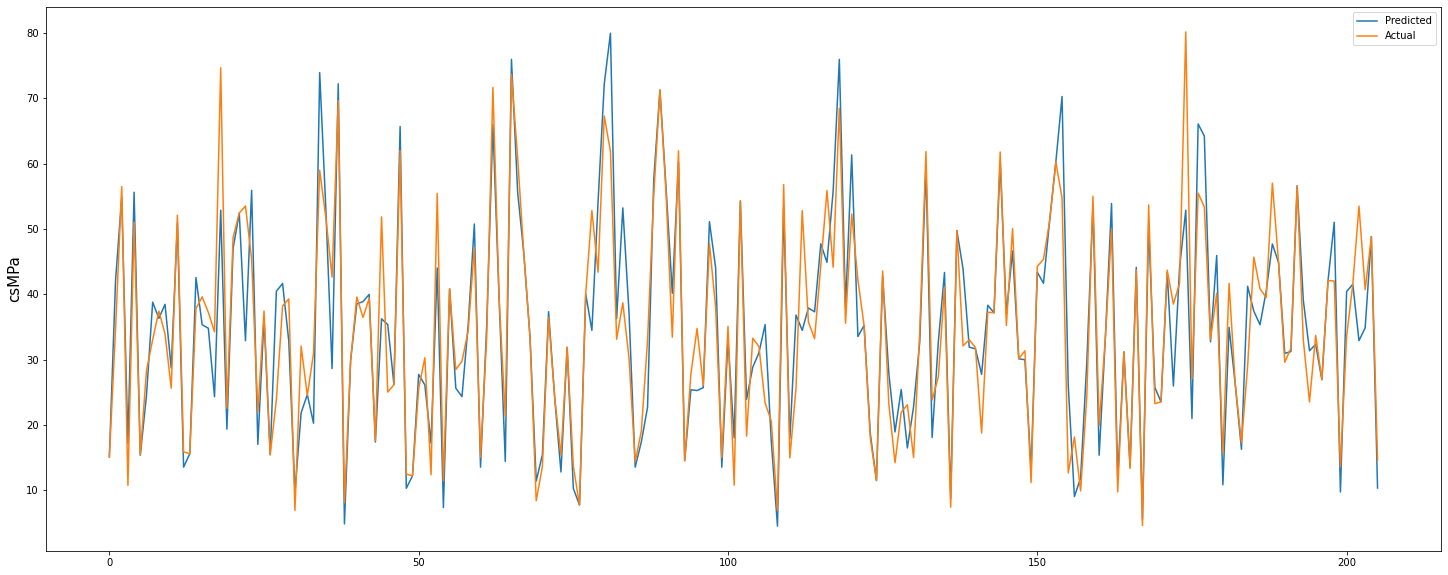

In [24]:
plt.figure(figsize = (25,10))

plt.plot(y_pred, label = 'Predicted')
plt.plot(y_test.values, label = 'Actual')

plt.ylabel('csMPa', fontsize =15)
plt.legend()

In [27]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 500,
                           bootstrap = True, max_samples = 0.8, n_jobs= -1,
                           oob_score =True
                          )

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=500, n_jobs=-1, oob_score=True)

In [28]:
bag_reg.oob_score_

0.9112727521807334

In [29]:
y_pred = bag_reg.predict(x_test)

print(r2_score(y_test, y_pred))

0.9109042044164312


In [32]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 500,
                           bootstrap = True, max_samples = 1.0, 
                           bootstrap_features = True, n_jobs= -1,
                           max_features = 0.8, oob_score =True
                          )

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                 bootstrap_features=True, max_features=0.8, n_estimators=500,
                 n_jobs=-1, oob_score=True)

In [33]:
bag_reg.oob_score_

0.799292705016232

In [34]:
y_pred = bag_reg.predict(x_test)

print(r2_score(y_test, y_pred))

0.7781742332722317
